In [11]:
import pandas as pd 
dataset=pd.read_csv("titanic-passengers.csv", sep=";")

#Preprocessing our data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(dataset)
data["Embarked"].fillna(method="ffill",inplace=True)
one_hot_Embarked=pd.get_dummies(data["Embarked"])
data=data.join(one_hot_Embarked)
data=data.drop("Embarked",axis=1)

data=data.drop("PassengerId",axis=1)


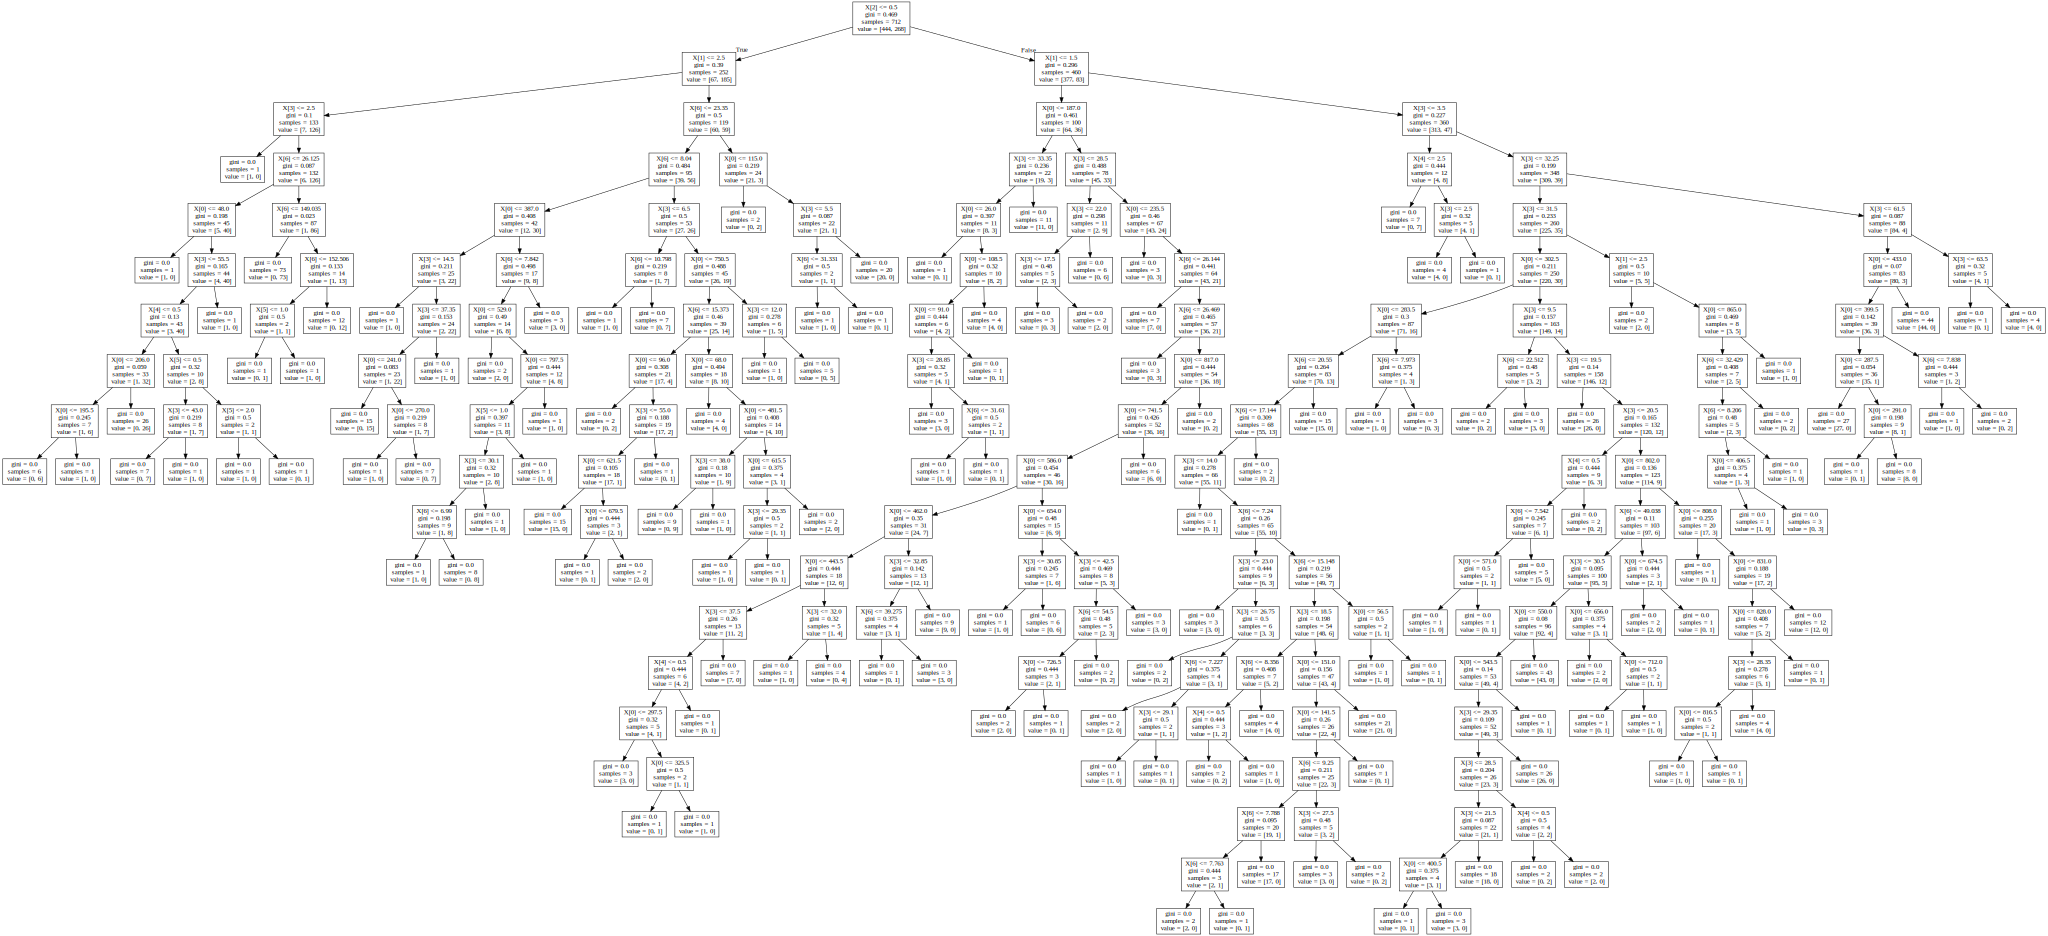

In [33]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = tree.export_graphviz(tree1, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("data")
graph

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
x1=data.drop(["Survived", "Name", "Cabin", "Ticket","C","Q"], axis=1)
y1= data["Survived"]

#splitting data
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1,y1, test_size=0.20,random_state=10)

#applying tree algorithm
tree2 = tree.DecisionTreeClassifier()  
tree2.fit(x_train1, y_train1)   #fitting our model
print(x_train1)
y_pred1=tree1.predict(x_test1)   # evaluating our model
print("score:{}".format(accuracy_score(y_test1, y_pred1)))

     Pclass  Sex   Age  SibSp  Parch     Fare  S
57        3    1  70.5      0      0   7.7500  0
717       3    1  29.0      1      0   7.0458  1
431       1    0  35.0      1      0  53.1000  1
633       1    1  28.0      1      0  82.1708  0
163       3    0  24.0      0      3  19.2583  0
..      ...  ...   ...    ...    ...      ... ..
369       3    1  21.0      0      0   7.8000  1
320       3    0  24.0      0      2  16.7000  1
527       3    1  28.5      0      0   7.2292  0
125       3    1  28.0      0      0   7.8958  1
265       1    0  49.0      0      0  25.9292  1

[712 rows x 7 columns]
score:0.4134078212290503


In [34]:
tree2 = tree.DecisionTreeClassifier(criterion = "gini", splitter = 'best', max_leaf_nodes = 10,min_samples_leaf = 5,max_depth= 5)
tree2.fit(x_train, y_train)   #fitting our model
y_pred=tree2.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))


score:0.7988826815642458


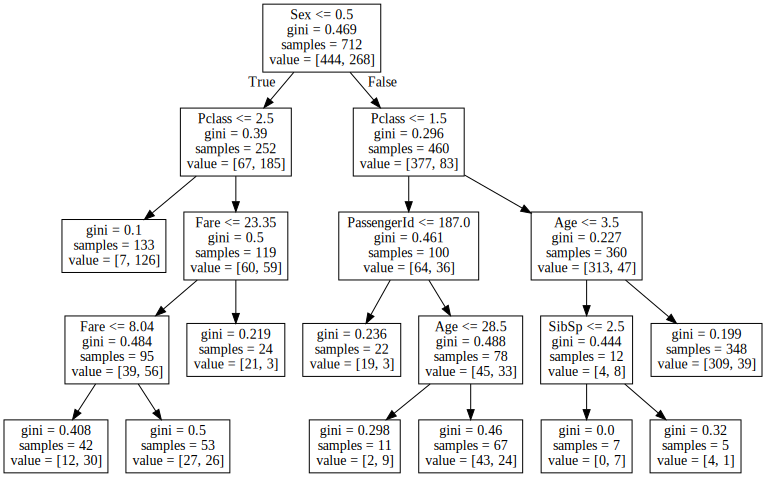

In [35]:
#Plot the decision tree
import graphviz
# DOT format
dot_data = tree.export_graphviz(tree2, out_file=None, feature_names = x.columns.values, rotate=False)
# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph.render("data")
graph

In [43]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy



X=data[['PassengerId', 'Pclass', 'Sex', 'Age','SibSp','Parch','Fare']] #features
y=data['Survived']  #target
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.3) #splitting data with test size of 30%
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8171641791044776


In [40]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB
